In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import librosa
import pandas as pd
import numpy as np
import pickle
!pip install tqdm
from tqdm import tqdm
import os
from tensorflow.keras.layers import Input, LSTM, Dense,GlobalAveragePooling1D,Dropout,BatchNormalization,Conv2D,Conv1D,MaxPooling1D,Activation,Concatenate,Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
pip install wget

In [ ]:
import wget
url= 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/21669/1692278/compressed/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1625914786&Signature=UU1c3ktNCI%2BiT8xsXBC3D1vWMXLxo0RoSTFGsDvr7lLQF%2BX59WnFU6oBDmtJm7iTCmJaEKITTCwlxYoCZT6HODX0eXyxWlROWrDOz0%2B6uyJmdwaXXUfGuzYD6HzC8ZeKjUcCfCK3J1ahxJbuVFep6sbIzveB%2FkZutoIo4HNLyhgGYYf0I8QO7%2FYo9jLIXl9dMKLqy6WpNjWMl3lQYOIx4XXa0BVhbcai2xEXGEkKqS0jLULuPgUTV32A%2F8T7ucEcFxJALr2bp355ekRDk4a4jmY0EenNcXbbQNQIh3x0RUu3VaYt%2Ffm3DBFaEZuOYXj0XuBBS%2BGZeGYYvwe7xnK14w%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.zip'

In [ ]:
wget.download(url, '/content/train.zip')
!unzip /content/train.zip

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/train_tp.csv')
#data

In [ ]:
y=data['species_id']
#data=data.drop('species_id',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.10, random_state=45,stratify=y)

In [ ]:
y_train_tranformed = []
wf_train_transformed = []

for i in tqdm(X_train["recording_id"]):

  min = data.loc[np.where(data["recording_id"] == i)]["t_min"].tolist()[0]
  max = data.loc[np.where(data["recording_id"] == i)]["t_max"].tolist()[0]
  species = data.loc[np.where(data["recording_id"] == i)]["species_id"].tolist()[0]
  #print(min,max)
  rec_path = '/content/' f"{i}.flac"
  wf, sr = librosa.load(rec_path,sr=None)
  count=0
  for i in range(3,63,3):

    if count<=min and max<=i+3:
      array_wf=wf[int(count*48000):int((i+3)*48000)]
      
      wf_train_transformed.append(np.array(array_wf))
      y_train_tranformed.append(species)

    elif count<min<=i+3:
      array_wf=wf[int(count*48000):int((i+3)*48000)]
      wf_train_transformed.append(np.array(array_wf))
      y_train_tranformed.append(species)

    elif count<max<=i+3:
      array_wf=wf[int(count*48000):int((i+3)*48000)]
      wf_train_transformed.append(np.array(array_wf))
      y_train_tranformed.append(species)
    
    else:
      array_wf=wf[int(count*48000):int((i+3)*48000)]
      wf_train_transformed.append(np.array(array_wf))
      y_train_tranformed.append(int(25))
    count=i


 49%|████▉     | 539/1094 [00:49<01:00,  9.13it/s]

In [ ]:
y_test_tranformed = []
wf_test_transformed = []

for i in tqdm(X_test["recording_id"]):

  min = data.loc[np.where(data["recording_id"] == i)]["t_min"].tolist()[0]
  max = data.loc[np.where(data["recording_id"] == i)]["t_max"].tolist()[0]
  species = data.loc[np.where(data["recording_id"] == i)]["species_id"].tolist()[0]
  print(min,max)
  rec_path = '/content/' f"{i}.flac"
  wf, sr = librosa.load(rec_path,sr=None)
  count=0
  for i in range(3,63,3):

    if count<=min and max<=i+3:
      array_wf=wf[int(count*48000):int((i+3)*48000)]
      
      wf_test_transformed.append(np.array(array_wf))
      y_test_tranformed.append(species)

    elif count<min<=i+3:
      array_wf=wf[int(count*48000):int((i+3)*48000)]
      wf_test_transformed.append(np.array(array_wf))
      y_test_tranformed.append(species)

    elif count<max<=i+3:
      array_wf=wf[int(count*48000):int((i+3)*48000)]
      wf_test_transformed.append(np.array(array_wf))
      y_test_tranformed.append(species)
    
    else:
      array_wf=wf[int(count*48000):int((i+3)*48000)]
      wf_test_transformed.append(np.array(array_wf))
      y_test_tranformed.append(int(25))
    count=i


In [ ]:
from numpy import load
X_train_spectrogram = load('/content/drive/MyDrive/X_train_spectrogram_newdimension.npz')
X_test_spectrogram = load('/content/drive/MyDrive/X_test_spectrogram_newdimension.npz')
X_test_spectrogram_original=X_test_spectrogram['arr_0'].astype('float16')
X_train_spectrogram_original=X_train_spectrogram['arr_0'].astype('float16')

In [ ]:
y_test_tranformed = load('/content/drive/MyDrive/y_test_tranformed_newdimension.npz')
y_train_tranformed = load('/content/drive/MyDrive/y_train_tranformed_newdimension.npz')
y_test_tranformed_original=y_test_tranformed['arr_0'].astype('float16')
y_train_tranformed_original=y_train_tranformed['arr_0'].astype('float16')

In [ ]:
print(len(y_test_tranformed_original),len(y_train_tranformed_original))
print(X_test_spectrogram_original.shape)
print(X_train_spectrogram_original.shape)

357 3135
(357, 384, 563)
(3135, 384, 563)


In [ ]:
y_train=tf.keras.utils.to_categorical(y_train_tranformed_original)
y_test=tf.keras.utils.to_categorical(y_test_tranformed_original)

In [ ]:
import datetime
import os
tf.keras.backend.clear_session()
%load_ext tensorboard
log_dir=os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)

from tensorflow.keras.callbacks import ModelCheckpoint
filepath="model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

callback_list = [checkpoint,tensorboard_callback]


input_layer = Input(shape=(64,563))
layer_lstm = LSTM(50,return_sequences=True)(input_layer)
averaged_output=GlobalAveragePooling1D()(layer_lstm)

layer = Dense(512,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001))(averaged_output)
layer = Dense(256,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001))(layer)
drop=Dropout(0.7)(layer)
layer = Dense(128,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001))(drop)
layer = Dense(64,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(),kernel_regularizer=tf.keras.regularizers.l1(0.0001))(layer)
output = Dense(25,activation='softmax')(layer)

#Creating a model
model = Model(inputs=input_layer,outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
model.fit(x=X_train_spectrogram_original,y=y_train,epochs=150,validation_data=(X_test_spectrogram_original,y_test),batch_size=64)

Epoch 1/150
49/49 [==============================] - 10s 146ms/step - loss: 4.6675 - accuracy: 0.0517 - val_loss: 4.5865 - val_accuracy: 0.0840
Epoch 2/150
49/49 [==============================] - 7s 133ms/step - loss: 4.5805 - accuracy: 0.0781 - val_loss: 4.5367 - val_accuracy: 0.1148
Epoch 3/150
49/49 [==============================] - 7s 133ms/step - loss: 4.5334 - accuracy: 0.0951 - val_loss: 4.4860 - val_accuracy: 0.1317
Epoch 4/150
49/49 [==============================] - 7s 133ms/step - loss: 4.5011 - accuracy: 0.1065 - val_loss: 4.4474 - val_accuracy: 0.1148
Epoch 5/150
49/49 [==============================] - 7s 133ms/step - loss: 4.4751 - accuracy: 0.1075 - val_loss: 4.4245 - val_accuracy: 0.1148
Epoch 6/150
49/49 [==============================] - 6s 132ms/step - loss: 4.4436 - accuracy: 0.1094 - val_loss: 4.3884 - val_accuracy: 0.1457
Epoch 7/150
49/49 [==============================] - 6s 132ms/step - loss: 4.4180 - accuracy: 0.1148 - val_loss: 4.3563 - val_accuracy: 0.126

In [ ]:
tf.keras.backend.clear_session()
input_layer=Input(shape=(384,563))
x=Conv1D(filters=96,kernel_size=3,strides=2,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(input_layer)
x=MaxPooling1D(strides=2)(x)
x=Conv1D(filters=48,kernel_size=5,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)
x=MaxPooling1D(strides=2)(x)
x=Conv1D(filters=48,kernel_size=5,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)
x=GlobalAveragePooling1D()(x)
x=Dense(256,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(),kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x) # Dense layer

x=Dropout(0.3)(x) # Dropout layer
output=Dense(25,activation='softmax')(x)
model = Model(inputs=[input_layer],outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 384, 563)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 191, 96)           162240    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 95, 96)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 91, 48)            23088     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 45, 48)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 48)            11568     
_________________________________________________________________
global_average_pooling1d (Gl (None, 48)                0     

In [ ]:
model.fit(x=X_train_spectrogram_original,y=y_train_tranformed_original,epochs=35,validation_data=(X_test_spectrogram_original,y_test_tranformed_original),batch_size=8)

Epoch 1/35
392/392 [==============================] - 19s 49ms/step - loss: 1.3755 - accuracy: 0.5557 - val_loss: 2.7115 - val_accuracy: 0.3697
Epoch 2/35
392/392 [==============================] - 18s 47ms/step - loss: 1.3084 - accuracy: 0.5866 - val_loss: 2.9345 - val_accuracy: 0.3473
Epoch 3/35
392/392 [==============================] - 19s 48ms/step - loss: 1.2829 - accuracy: 0.5898 - val_loss: 2.8275 - val_accuracy: 0.3445
Epoch 4/35
392/392 [==============================] - 19s 49ms/step - loss: 1.2247 - accuracy: 0.5997 - val_loss: 2.9088 - val_accuracy: 0.3417
Epoch 5/35
392/392 [==============================] - 19s 48ms/step - loss: 1.1934 - accuracy: 0.6121 - val_loss: 2.9404 - val_accuracy: 0.3445
Epoch 6/35
392/392 [==============================] - 19s 48ms/step - loss: 1.1434 - accuracy: 0.6351 - val_loss: 2.9769 - val_accuracy: 0.3697
Epoch 7/35
392/392 [==============================] - 19s 48ms/step - loss: 1.1270 - accuracy: 0.6284 - val_loss: 3.0009 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
predicted = model.predict(X_test_spectrogram_original)

In [ ]:
list_per=[i.tolist().index(np.max(i)) for i in predicted ]
print()

[6, 23, 11, 5, 10, 3, 19, 8, 22, 22, 8, 15, 15, 15, 18, 18, 20, 20, 9, 20, 16, 15, 15, 17, 24, 2, 0, 2, 16, 14, 14, 14, 8, 5, 24, 24, 6, 16, 17, 17, 21, 8, 21, 24, 5, 17, 20, 23, 6, 6, 20, 22, 10, 12, 12, 15, 24, 22, 10, 8, 8, 8, 8, 22, 3, 10, 10, 1, 13, 1, 23, 18, 23, 17, 19, 19, 15, 20, 15, 11, 11, 23, 15, 15, 15, 15, 10, 10, 7, 5, 16, 16, 12, 12, 18, 6, 23, 6, 17, 24, 10, 6, 11, 11, 20, 20, 20, 20, 20, 23, 23, 23, 23, 23, 9, 10, 17, 5, 23, 22, 20, 20, 12, 14, 14, 14, 9, 9, 8, 8, 8, 16, 12, 1, 13, 24, 0, 5, 22, 1, 2, 12, 22, 14, 14, 19, 19, 23, 23, 23, 23, 23, 22, 10, 10, 16, 16, 8, 21, 8, 4, 4, 13, 7, 10, 22, 23, 22, 23, 23, 23, 22, 24, 21, 4, 4, 4, 4, 4, 4, 4, 17, 17, 17, 17, 2, 2, 4, 4, 4, 23, 23, 10, 19, 24, 23, 13, 0, 0, 22, 10, 22, 11, 11, 11, 21, 21, 23, 11, 20, 10, 10, 10, 12, 24, 12, 16, 16, 16, 8, 8, 16, 16, 1, 1, 1, 22, 2, 12, 18, 13, 1, 1, 1, 18, 18, 18, 24, 24, 24, 23, 17, 17, 1, 15, 15, 15, 15, 6, 6, 16, 21, 21, 21, 23, 23, 7, 7, 19, 18, 18, 23, 23, 23, 3, 24, 24, 16, 4

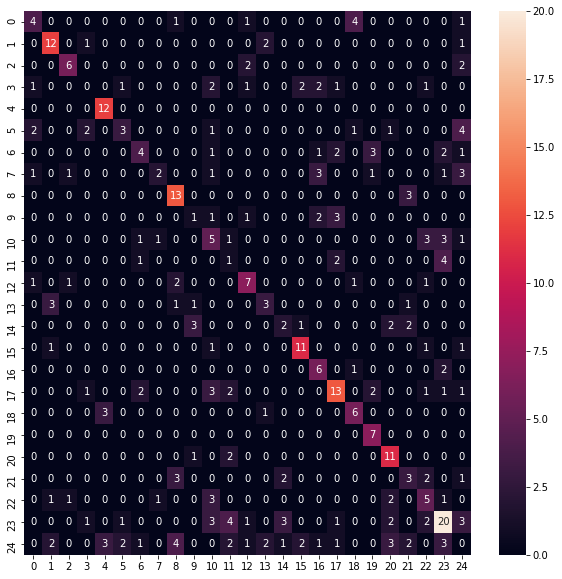

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test_tranformed_original, list_per)
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cf_matrix, annot=True)

array([10., 10., 10.,  5.,  5.,  5., 19., 24., 21., 21., 21., 15., 15.,
       15., 18., 18., 20., 20., 20., 20., 16.,  3.,  3.,  3.,  2.,  2.,
        7.,  7., 24., 24., 21., 21.,  0.,  5.,  5.,  5., 11.,  9.,  9.,
        9., 21., 24., 24., 23., 23., 23., 24.,  6.,  6.,  6., 22., 22.,
       22., 12., 12., 15., 15., 15., 15.,  8.,  8.,  8.,  8., 17., 17.,
       17., 17.,  1.,  1., 24., 16., 16., 16., 24.,  6.,  6., 14., 14.,
       24., 24., 11., 11., 15., 15., 15., 15., 10., 10., 10., 24., 16.,
       16., 12., 12., 12., 24., 17., 17., 17., 17., 17., 17., 20., 20.,
       20., 20., 20., 20., 20., 23., 23., 23., 23., 24.,  9.,  9.,  9.,
       24., 22., 22., 22., 24., 23., 23., 23., 23., 14., 14.,  8.,  8.,
        8.,  9.,  9.,  1.,  1.,  1.,  3.,  3., 22., 22., 22.,  3.,  3.,
       14., 14., 19., 19., 24., 23., 23., 23., 23., 10., 10., 10.,  3.,
        3., 21., 21., 21.,  4.,  4., 24., 22., 22., 10., 10., 10., 23.,
       23., 23., 23., 21., 21., 24.,  4.,  4.,  4.,  4.,  4.,  4

In [ ]:
input_layer=Input(shape=(64,563)) 
# Input layer
lstm_layer=LSTM(units=50,return_sequences=True)(input_layer) # LSTMlayer with 25 units
average=GlobalAveragePooling1D()(lstm_layer) #Global average pool
layer_1=Dense(50,activation='relu')(average) # Dense layer



x=Conv1D(filters=96,kernel_size=3,strides=2,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())(input_layer)
x=MaxPooling1D(strides=2)(x)
x=Conv1D(filters=48,kernel_size=5,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())(x)
x=MaxPooling1D(strides=2)(x)
x=Conv1D(filters=48,kernel_size=5,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())(x)
x=GlobalAveragePooling1D()(x)
x=Dense(256,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())(x) # Dense layer
x=Dense(128,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())(x) # Dense layer


x=Concatenate()([layer_1,x])

x=Dense(64)(x)
x=Dropout(0.3)(x)

output=Dense(25,activation='softmax')(x)
model = Model(inputs=[input_layer],outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 563)]    0                                            
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 31, 96)       162240      input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_2 (MaxPooling1D)  (None, 15, 96)       0           conv1d_3[0][0]                   
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 11, 48)       23088       max_pooling1d_2[0][0]            
____________________________________________________________________________________________

In [ ]:
model.fit(x=X_train_spectrogram_original,y=y_train,epochs=150,validation_data=(X_test_spectrogram_original,y_test),batch_size=8)

Epoch 1/150
392/392 [==============================] - 24s 54ms/step - loss: 3.2506 - accuracy: 0.1018 - val_loss: 3.1072 - val_accuracy: 0.1261
Epoch 2/150
392/392 [==============================] - 20s 52ms/step - loss: 3.0879 - accuracy: 0.1397 - val_loss: 2.9973 - val_accuracy: 0.1373
Epoch 3/150
392/392 [==============================] - 20s 52ms/step - loss: 2.9456 - accuracy: 0.1518 - val_loss: 2.9074 - val_accuracy: 0.1681
Epoch 4/150
392/392 [==============================] - 20s 51ms/step - loss: 2.8409 - accuracy: 0.1863 - val_loss: 2.7644 - val_accuracy: 0.2129
Epoch 5/150
392/392 [==============================] - 20s 52ms/step - loss: 2.7249 - accuracy: 0.2300 - val_loss: 2.7313 - val_accuracy: 0.2409
Epoch 6/150
392/392 [==============================] - 20s 52ms/step - loss: 2.5922 - accuracy: 0.2660 - val_loss: 2.6165 - val_accuracy: 0.2885
Epoch 7/150
392/392 [==============================] - 20s 51ms/step - loss: 2.4750 - accuracy: 0.2915 - val_loss: 2.5104 - val_ac

KeyboardInterrupt: ignored

In [ ]:
count=0
for i in range(3,63,3):
  print(count,i+3)
  if count<=43 and 49<=i+3:
    print(count,i+3,'ok')
  elif count<43<=i+3:
    print(count,i+3,'ok')
  elif count<49<=i+3:
    print(count,i+3,'ok')

  count=i

0 6
3 9
6 12
9 15
12 18
15 21
18 24
21 27
24 30
27 33
30 36
33 39
36 42
39 45
39 45 ok
42 48
42 48 ok
45 51
45 51 ok
48 54
48 54 ok
51 57
54 60
57 63


In [ ]:
def lrap(y_true, y_pred):
    return tf.py_function(label_ranking_average_precision_score, (y_true, y_pred), tf.double)

In [ ]:

!pip install tensorflow_addons
import tensorflow_addons as tfa

     |████████████████████████████████| 686kB 5.1MB/s 


In [ ]:
tf.keras.backend.clear_session()
input_layer=Input(shape=(384,563))
x1=Conv1D(filters=96,kernel_size=3,strides=2,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())(input_layer)
x2=Conv1D(filters=96,kernel_size=5,strides=2,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())(input_layer)
x3=Conv1D(filters=96,kernel_size=7,strides=2,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())(input_layer)
x4=Conv1D(filters=96,kernel_size=9,strides=2,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())(input_layer)
x5=Conv1D(filters=96,kernel_size=11,strides=2,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())(input_layer)

x=Concatenate(axis=1)([x1,x2,x3,x4,x5])
x=MaxPooling1D(strides=2)(x)
x1=Conv1D(filters=48,kernel_size=3,strides=2,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())(x)
x2=Conv1D(filters=48,kernel_size=5,strides=2,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())(x)
x3=Conv1D(filters=48,kernel_size=7,strides=2,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())(x)
x4=Conv1D(filters=48,kernel_size=9,strides=2,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())(x)
x5=Conv1D(filters=48,kernel_size=11,strides=2,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal())(x)

x=Concatenate(axis=1)([x1,x2,x3,x4,x5])

x=MaxPooling1D(strides=2)(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(50,activation='relu')(x)
x=Dropout(0.2)(x)
output=Dense(25,'softmax')(x)
model = Model(inputs=[input_layer],outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 384, 563)]   0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 191, 96)      162240      input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 190, 96)      270336      input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 189, 96)      378432      input_1[0][0]                    
______________________________________________________________________________________________

In [ ]:
model.fit(x=X_train_spectrogram_original,y=y_train_tranformed_original,epochs=35,validation_data=(X_test_spectrogram_original,y_test_tranformed_original),batch_size=864)

NameError: ignored

In [ ]:
fl = tfa.losses.SigmoidFocalCrossEntropy()
loss = fl(
    y_true = [[1.0,0.0,0.0,0.0,0.0], [1.0,0.0,0.0,0.0,0.0], [1.0,0.0,0.0,0.0,0.0]],y_pred = [[1.0,0.0,0.0,0.0,0.0], [1.0,0.0,0.0,0.0,0.0], [1.0,0.0,0.0,0.0,0.0]])
loss

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [ ]:
y_test_cat.shape

(357, 25)

In [ ]:
model2.fit(x=X_train_spectrogram_original,y=y_train_tranformed_original,epochs=35,validation_data=(X_test_spectrogram_original,y_test_tranformed_original),batch_size=512)

Epoch 1/35
7/7 [==============================] - 22s 3s/step - loss: 0.8772 - accuracy: 0.7828 - val_loss: 2.0152 - val_accuracy: 0.5042
Epoch 2/35
7/7 [==============================] - 22s 3s/step - loss: 0.8564 - accuracy: 0.7920 - val_loss: 2.0079 - val_accuracy: 0.4790
Epoch 3/35
7/7 [==============================] - 22s 3s/step - loss: 0.8136 - accuracy: 0.8061 - val_loss: 1.9991 - val_accuracy: 0.5042
Epoch 4/35
7/7 [==============================] - 22s 3s/step - loss: 0.8162 - accuracy: 0.8067 - val_loss: 2.0116 - val_accuracy: 0.4958
Epoch 5/35
2/7 [=======>......................] - ETA: 16s - loss: 0.7746 - accuracy: 0.8252

KeyboardInterrupt: ignored